TP1
========

**Objectif**: calculer les coefficients de la SFD (Série de Fourier Discrète) avec Python et à la main.

**Prérequis** le cours associé est le CM2, "Série de Fourier Discrète".

**Durée:** 4h

**Instructions générales:**
    
* téléchargez le fichier notebook `.ipynb` à l'adresse [www](https://gitlab.com/hazaa/oml3/-/blob/main/book/TP1-DFT.ipynb)
* remettez votre travail sur eprel.
* un fichier nommé: ```TP1-NOM.ipynb```
* Si vous cherchez de l'**aide** sur une fonction Python/Numpy depuis Jupyter Notebook
   *  ouvrez une cellule et taper par exemple `?np.sin`, puis validez.
   *  sinon cherchez dans sur la documentation générale [Python](https://docs.python.org/) ou [Numpy](https://numpy.org/doc/stable/reference/)
   * tout en bas de ce notebook, vous trouverez un **aide-mémoire** des fonctions numpy utiles.

In [1]:
# code à executer en début de TP
import numpy as np
from scipy.fft import fft, ifft, fftfreq, fftshift
import matplotlib.pylab as plt
from scipy.io import wavfile
plt.rc('font',size=18)

1 Introduction au calcul vectorisé sous Python
----------

### a) Calcul vectorisé

Supposons qu'on veuille calculer les carrés de entiers de 0 à 4 en **langage C**.
On déclare un tableau et on écrit une boucle:

```C
n=5;
int tab[n];
for(int i=0;i<n; i++)
    {tab[i]=i*i;
    }
```


A l'inverse, sous **Python** (mais aussi Matlab, etc...) on va plutôt:
    
1. définir un vecteur `v = np.arange(5)`, c'est à dire un tableau d'entiers de $0$ jusqu'à $4$, de taille 5.
1. appliquer une fonction **"vectorisée"** sur ce tableau: `np.power(v,2)`, c'est-à-dire une fonction qui va agir terme-à-terme sur **chacun** des éléments du tableau.
             

In [5]:
v = np.arange(5)
v_square = np.power(v,2)

print("v={}".format(v))
print("v_square={}".format(v_square))


v=[0 1 2 3 4]
v_square=[ 0  1  4  9 16]


NB: Pour **lire** la valeur d'un tableau, la syntaxe est la même qu'en langage C: 

In [ ]:
print(v[0])

Une autre manière de calculer le carré des éléments du tableau est de multiplier `v` par lui-même, ce qui donne un produit **terme à terme**:

In [37]:
v*v

array([ 0,  1,  4,  9, 16])

**QUESTION 1.1**: En Python, calculer et afficher le cube des entiers de 0 jusqu'à 10    

### b) Tracé de diagramme

Pour tracer le diagramme d'une fonction on dispose de plusieurs fonctions: `stem(x,y)`, `plot(x,y)` où $x$ est un vecteur contenant les abscisses des points qu'on veut dessiner, et $y$ un vecteur contenant les ordonnées.

On peut dessiner plusieurs diagrammes côte à côte avec la fonction `subplots`.

In [7]:
# un seul diagramme
N=8
n = np.arange(N)
k0 = 1
xn=np.sin(2*(np.pi/N)*k0*n)

plt.stem(n, xn) # ax[0]: premier graphe
plt.xlabel('n')
plt.ylabel(r'$x_n$')

Text(0, 0.5, '$x_n$')

In [9]:
# deux diagrammes côte-à-côte

N=8
k0 = 1
n = np.arange(N)
xn=np.sin(2*(np.pi/N)*k0*n)

fig,ax = plt.subplots(1,2, figsize=(15,5))     # plusieurs graphes. 1 ligne, 2 colonnes
ax[0].stem(n, xn)                              # ax[0]: premier graphe
ax[0].set_xlabel('n')
ax[0].set_ylabel(r'$x_n$')

k0 = 2
n = np.arange(N)
xn=np.sin(2*(np.pi/N)*k0*n)

ax[1].stem(n, xn)                              # ax[1]: second graphe
ax[1].set_xlabel('n')
ax[1].set_ylabel(r'$x_n$')

Text(0, 0.5, '$x_n$')

**QUESTION 1.2** soit une exponentielle complexe périodique $N=16, ~k_0=2$. Tracer deux diagrammes côte-à-côte: le premier avec la partie réelle de l'exponentielle, le second avec sa partie imaginaire. Reportez-vous à l'aide en bas du sujet pour trouver les bonnes fonctions.

2 Série de Fourier Discrète, signaux simples
-------

**QUESTION 2.1:**  Rappeler la définition des $X[k]$ 

Soit un signal **réel** $x[n]$ de longueur $N$. On peut calculer les $X[k]$ sous Python avec la fonction `fft()`.

In [41]:
# Exemple
N=8
k0 = 1
n = np.arange(N)
xn=np.cos(2*(np.pi/N)*k0*n)

# calcul de la TFD
Xk=fft(xn,norm='forward')

# affichage
k=n
fig,ax = plt.subplots(1,2, figsize=(15,5))     # plusieurs graphes. 1 ligne, 2 colonnes
ax[0].stem(k,np.real(Xk))
ax[0].set_xlabel('k')
ax[0].set_ylabel('Re(X[k])')

ax[1].stem(k, np.imag(Xk)) # ax[1]: second graphe
ax[1].set_xlabel('k')
ax[1].set_ylabel('Im(X[k])')
ax[1].set_ylim([-0.02,0.5])   # A MODIFIER !!! (pour changer l'échelle de l'axe de y)

(-0.02, 0.5)

**QUESTION 2.2:**

1. rappeler les valeurs de $X[k]$ obtenues par calcul à la main (cf TD).
1. comparer les valeurs de $X[k]$ obtenues par calcul à la main et le résultat ci-dessus.
1. parité: rappeler le résultat du cours sur la partie réelle de $X[k]$. Comment calculer $\mathcal{Re}(X[k])$ pour $k \in [-7;-1]$ ?
1. parité: rappeler le résultat du cours sur la partie imaginaire de $X[k]$. Comment calculer $\mathcal{Im}(X[k])$ pour $k \in [-7;-1]$ ?
1. périodicité: rappeler le résultat du cours sur la périodicité de $X[k]$. Comment calculer $X[k]$ pour $k \in [8;16]$ ?


**QUESTION 2.3** soit le signal $x[n]=\sin(\frac{2 \pi}{N}k_0 n)$ pour $N=16$ et $k_0=1$

1. rappeler les valeurs de $\mathcal{Re}(X[k])$ et $\mathcal{Im}(X[k])$ obtenues par calcul à la main (cf cours/TD).
1. comparer les valeurs de $\mathcal{Re}(X[k])$ et $\mathcal{Im}(X[k])$ obtenues par calcul à la main et le résultat obtenu avec `fft()`.

**QUESTION 2.4** soit le signal $x[n]= 1+ \sin(\frac{2\pi}{N}n) + 3\cos(\frac{2\pi}{N}n) + \cos(\frac{4\pi}{N}n)$ pour $N=16$.

1. rappeler les valeurs de $\mathcal{Re}(X[k])$ et $\mathcal{Im}(X[k])$ obtenues par calcul à la main (cf cours/TD).
1. comparer les valeurs de $\mathcal{Re}(X[k])$ et $\mathcal{Im}(X[k])$ obtenues par calcul à la main et le résultat obtenu avec `fft()`.


**QUESTION 2.5** soit le signal $x[n]=\cos(\frac{2 \pi}{N}k_0 n)$ pour $N=16$. 
On note $X_{k_0}[k]$ les valeurs des coefficients pour une valeur particulière de $k_0$.
Pour chacune des valeurs de $k_0$ dans $[0,1,3,5,7]$:
    
1. rappeler les valeurs de $\mathcal{Re}(X_{k_0}[k])$ et $\mathcal{Im}(X_{k_0}[k])$ obtenues par calcul à la main (cf cours/TD) et les résumer dans un tableau suivant le modèle ci-dessous.
1. Tracer $\mathcal{Re}(X_{k_0}[k])$ et $\mathcal{Im}(X_{k_0}[k])$ en fonction de $k$ en vous aidant du code Python ci-dessous.
1. comparer les valeurs de $\mathcal{Re}(X_{k_0}[k])$ et $\mathcal{Im}(X_{k_0}[k])$ obtenues par calcul à la main et le résultat obtenu avec `fft()`.

| | $k_0=0$|1|$\ldots$|7|
|---|---|---|---|---|
| $k=0$| $\mathcal{Re}(X_{k_0}[k]), \mathcal{Im}(X_{k_0}[k])$ | $\ldots$ | ||
| $k=1$|$\vdots$ || ||
| $\vdots$| || ||
| $k=N$| || ||


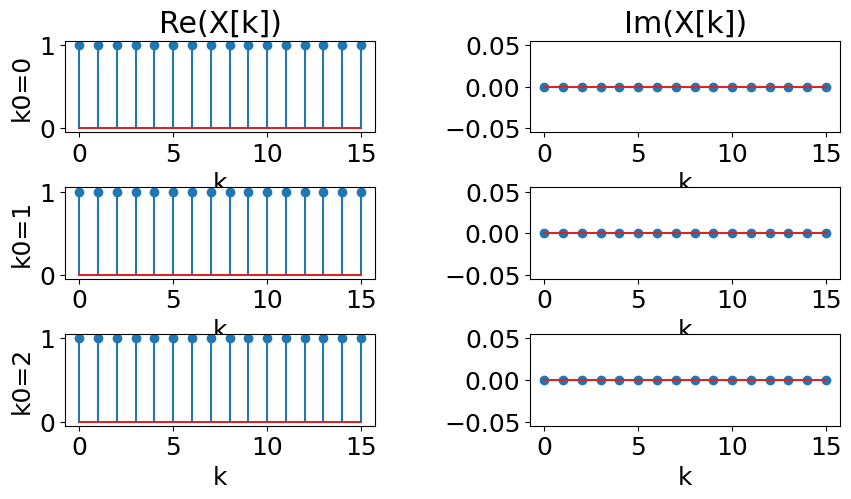

In [36]:
# code à modifier, affichage de plusieurs spectrogrammes
k0_l=[0,1,2]                        # A MODIFIER !!! 
n_k0 = len(k0_l)
fig,ax = plt.subplots(n_k0,2,figsize=(10,5))     # plusieurs graphes. plusieurs lignes, 2 colonnes
N= 16
n = np.arange(N)

for i in range(n_k0):
    k0= 0                         # A MODIFIER
    # création du signal
    xn= np.ones(N)                # A MODIFIER !!!
    # calcul de la TFD 
    Xk= np.ones(N)                # A MODIFIER !!!
    # affichage
    k=n
    ax[i][0].stem(k,np.real(Xk))
    ax[i][0].set_xlabel('k')
    if i==0:
        ax[i][0].set_title('Re(X[k])')
    ax[i][0].set_ylabel('k0={}'.format(k0_l[i]))
    
    ax[i][1].stem(k, np.imag(Xk)) # ax[1]: second graphe
    ax[i][1].set_xlabel('k')
    #ax[i][1].set_ylim([0,0.5])   # pour changer l'échelle de l'axe de y
    if i==0:
        ax[i][1].set_title('Im(X[k])')
        
fig.subplots_adjust(hspace=0.6,wspace=0.5)


**QUESTION 2.6** le calcul des coefficients de la SFD $X[k]$ à partir de $x[n]$ est réversible, comme vu en cours. En Python, on dispose de la fonction **inverse** `ifft(Xk,norm='forward')` pour effectuer ce calcul.

1. Rappeler la formule de reconstruction d'un signal temporel $x[n]$ à partir des coefficients de la SFD $X[k]$
1. Soit un signal cosinus tel que $N=16$ et $k_0=1$. Calculer d'abod les $X[k]$ puis calculer les $x[n]$ grâce à la fonction ci-dessus. 
1. Vérifier qu'on retrouve bien le signal de départ, en l'affichant dans le domaine temporel.

**QUESTION 2.7** lorsque la période du signal échantillonné ne correspond pas à $N$, on a vu en cours que la `fft()` obtenue n'était pas aussi simple que pour un cosinus $N$-périodique.

1. Soit le signal $x[n]=\cos(\frac{2\pi}{14}n)$ pour $n \in [0; N]$ et $N=64$. Tracer  $\mathcal{Re}(X[k])$ et $\mathcal{Im}(X[k])$ obtenues avec `fft()`.
1. Comparer le résultat obtenu avec le cas d'un cosinus $y[n]=\cos(\frac{2\pi}{16}n)=\cos(\frac{2\pi}{64}k_0 n)$ avec $k_0=4$.
1. Interpréter.

**QUESTION 2.8** On dipose d'un signal $v[n]$ défini ci-dessous, qui modélise le courant dans une charge non-linéaire. On veut calculer le **Total Harmonic Distorsion** (THD), pour quantifier l'écart avec une sinusoïde.

1. Rappeler la formule vue en TD4 exo 5 pour le THD.
1. Calculer et afficher les coefficients $X[k]$.
1. En déduire le THD.

In [ ]:
n=np.arange(64)
vn = np.sin(2*np.pi/16*n)
thr=0.7
idx_vn_pos = vn>thr
idx_vn_neg = vn<-thr
vn[idx_vn_pos]=thr
vn[idx_vn_neg]=-thr

3 SFD de signaux réels
--------------

On va maintenant travailler sur signaux réels inconnus, échantillonnés à $f_s=16~kHz$.

* Téléchargez le fichier `vi-1483315200_234072_trim.wav` à l'adresse: [www](https://gitlab.com/hazaa/oml3/-/tree/main/book/data)
* Executez le code ci-dessous qui va charger les données.
* les données contiennent les mesures de deux canaux d'acquisition distincts. Elles sont donc stockées dans un tableau de dimension 2. Pour accéder à l'un ou l'autre canal, il faut choisir `x[:,0]` ou `x[:,1]`.

In [28]:
wav_fname = 'data/vi-1483315200_234072_trim.wav'  # A MODIFIER !!!
samplerate, data = wavfile.read(wav_fname)
length = data.shape[0] / samplerate

print(f"number of channels = {data.shape[1]}")
print(f"length = {length}s")

number of channels = 2
length = 1.0s


**QUESTION 3.1**:
* dans le domaine temporel: tracer deux graphes côte à côte de chacun des canaux.
* dans le domaine fréquentiel: pour le premier canal uniquement, tracer le graphe du module au carré de $X[k]$. Utiliser le code ci-dessous.


**NB**: 
   * ce code utilise une échelle logarithmique pour l'axe des y: `ax[0].semilogy(x,y)` au lieu de la fonction ```plot()```. 
   * pour zoomer (dans les fréquences positives): `ax[0].set_xlim([0,b])`
    

In [ ]:
# code pour l'affichage, A MODIFIER

n=data.shape[0]                           # la taille du tableau
time = np.linspace(0., length, n)         # la base de temps
xn = data[0:n, 0]

#  fft
Fs = 0                                    # Fréquence d'échantillonnage, A MODIFIER !!!
Xk = 0                                    # A MODIFIER !!!

# fréquences
freq = fftfreq(n, 1/Fs)

# affichage
fig,ax = plt.subplots(1,1, figsize=(15,5))     
ax.semilogy(freq, np.abs(X)**2)               
ax.set_xlabel('frequence (Hz)')
ax.set_ylabel('|Xk|^2)')
ax.set_xlim([0,500])
ax.grid(axis='x', color='0.5')

**QUESTION 3.2**: interprétez le graphe précédent. A votre avis quelle grandeur observe-t-on ?

**QUESTION 3.3**: 

1. Le fondamental est-il largement dominant ? Comment cela s'interprète ? 
1. Calculer le Taux de Distorsion Harmonique (TDH) d'après le spectre observé.

**QUESTION 3.4**: répéter les questions précédentes avec le second canal.

Annexes
-------

<h3>Commandes Python/Numpy/Scipy utiles</h3>

|  | Explication | Exemple |
|----|----|----|
|  `1j` | Nombre complexe $j$ | `np.real(1j)`| 
|  `np.pi` | Constante de valeur $\pi$ | Affiche la valeur de $\cos(\pi)$: `np.cos(np.pi)`| 
|`np.ones(n)`|vecteur composé de 1 |`x=np.ones(10)`|
|`np.zeros(n)`|vecteur composé de 0 |`y=np.zeros(20)`|
|  `np.linspace(a,b,n)` | Calcule $n$ points répartis sur un intervalle $[a,b]$ | `t=np.linspace(0,1,10)`|   
| `np.sin,np.cos,np.exp` | Fonctions vectorisées de base | `A = np.sin(np.pi/2.) +np.exp(-1)` | 
|   | | `x=np.linspace(0,2*np.pi,50); y=np.sin(x)` | 
| carré | `**2`| `x=2; y=x**2` | 
|  | | `x=np.linspace(0,1,50); y=x**2` | 
|  `np.sqrt(x)` | Racine carrée | `np.sqrt(4)`| 
|  `plt.plot(t,x)` | Trace une ligne composée de points $(x_1,y_1), (x_2,y_2), \ldots$| `t = np.linspace (0,1,10); plt.plot(t,t**2)`|  
|`np.real(x)`| partie réelle| `np.real(2+1j)`|
|`np.imag(x)`| partie imaginaire|`np.imag([1,1j])`|
|`np.sum(x)`| somme des éléments de `x`| `np.sum([1,1,1])`|
|`np.abs`| valeur absolue (ou module pour les complexes )| `np.abs(-1); np.abs(1+1j)`|
|`x.shape`| taille d'un tableau crée avec numpy| `x=np.zeros(10); print(x.shape[0])`| 
|`x.dtype`|type des éléments tableau numpy| `x=np.linspace(0,1,10); x.dtype`|
|`ax[0].set_xlabel()`| assigner un titre à l'axe des abscisses| |
|`ax[0].set_xlim([a,b])`| changer la zone de l'axe des abscisses|`fig,ax = plt.subplots(1,2); ax[0].plot(x,y); ax[0].set_xlim([0,1])` |
|`ax[0].set_ylim([a,b])`| changer la zone de l'axe des ordonnées|`fig,ax = plt.subplots(1,2); ax[0].plot(x,y); ax[0].set_ylim([0,1])` |
|`ax[0].semilogy(x,y)`| comme `plot` mais en échelle y logarithmique|`fig,ax = plt.subplots(1,2);ax[0].semilogy(x,y)` |
|`fft()`| voir documentation ci-dessous|`Xk = fft(x,norm='forward')`|
|`ifft()`| voir documentation ci-dessous|`xn = ifft(Xk,norm='forward')`|


La [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html#scipy.fft.fft) de la fonction scipy `fft()` nous dit que si `y=fft(x)`:

>    The frequency term ``f=k/n`` is found at ``y[k]``. At ``y[n/2]`` we reach
>    the Nyquist frequency and wrap around to the negative-frequency terms.


La [documentation](https://docs.scipy.org/doc/scipy/tutorial/fft.html#d-discrete-fourier-transforms) dit aussi que:


> For N even, the elements `y[1]...y[N/2-1]` contain the positive-frequency terms, and the elements
> `y[N/2]...y[N-1]` contain the negative-frequency terms, in order of
> decreasingly negative frequency. For N odd, the elements
> `y[1]...y[(N-1)/2]` contain the positive-frequency terms, and the
> elements `y[(N+1)/2]...y[N-1]` contain the negative-frequency terms, in order of decreasingly negative frequency.
>
> In case the sequence x is real-valued, the values of `y[n]` for positive
> frequencies is the conjugate of the values `y[n]` for negative
> frequencies (because the spectrum is symmetric). Typically, only the FFT
> corresponding to positive frequencies is plotted

(source : [github](https://github.com/scipy/scipy/blob/main/doc/source/tutorial/fft.rst))


<h3>Commandes Markdown/Latex</h3>

* Le mieux est de cliquer sur les cases de l'énoncé qui contiennent des expressions mathématiques, pour voir le code markdown/latex associé. Pour revenir à l'affichage des formules, executer la cellule avec Jupyter.
* On peut faire la même chose sur les formules du cours, avec un clic droit sur les formules. Puis choisir "Show Maths As" > "Tex Command".

<h3>Références</h3>

https://fr.mathworks.com/matlabcentral/fileexchange/106725-fourier-analysis

https://docs.scipy.org/doc/scipy/tutorial/fft.html#

Real signal:
* https://www.researchgate.net/publication/310463352_COOLL_Controlled_OnOff_Loads_Library_a_Public_Dataset_of_High-Sampled_Electrical_Signals_for_Appliance_Identification
* https://coolldataset.github.io/
* https://jack-kelly.com/data/ , https://data.ukedc.rl.ac.uk/browse/edc/efficiency/residential/EnergyConsumption/Domestic/UK-DALE-2017/UK-DALE-2017-16kHz/house_1/2017/wk01, https://www.researchgate.net/publication/261289463_The_UK-DALE_dataset_domestic_appliance-level_electricity_demand_and_whole-house_demand_from_five_UK_homes
* https://github.com/18D070001
            
IO:
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.htm     
    
Conversion    :
* sox
* https://github.com/kkroening/ffmpeg-python/tree/master/examples
    

### More datasets

* pseudo guitare $e^{-t} sin$, comme dans `FourierTransform.mlx`
* cool dataset 100kHz

#### Audio data preprocessing

will copy the first ten seconds:

> sox infile outfile trim 0 10
  

down to 16 bits, since 24 bit is not supported by io.read

> sox vi-1483315200_234072.flac -b 16 vi-1483315200_234072_.wav trim 0 1